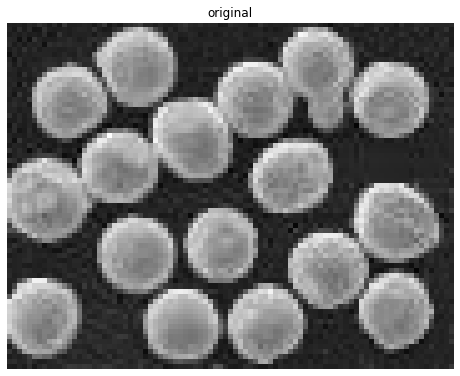

In [31]:
from skimage.filters import rank
from skimage.morphology import disk
from sklearn import mixture
import Dataset
from Utils import visualize

original = Dataset.load_by_path('small.png')
visualize(original, 'original')

In [33]:
from SpectralClustering import SpectralClustering

clusterize = SpectralClustering([original],
                        graph_beta=5,
                        graph_eps=0,
                        max_transform_size=256)

result = clusterize.apply(n_clusters=5, 
                          n_init=1,
                          eigen_solver='amg',
                          assign_labels='discretize', 
                          random_state=1)

# visualize(clusterize.labels, 'labels')

In [ ]:
import matplotlib.pyplot as plot
from scipy.sparse import coo_matrix

graph: coo_matrix = clusterize.graph_list[0]

plot.scatter(graph.row,
             graph.col,
             s=50,
             c=graph.data,
             marker="o")
# plot.xlim((510, 515))
# plot.ylim((255, 260))
plot.grid()
plot.show()

In [ ]:
from math import ceil

def display_all(images, size):
    plot.figure(figsize=size)
    
    row_amount = ceil(len(images) / 5)
    for i, img in enumerate(images):
        plot.subplot(row_amount, 5, i+1)
        plot.imshow(img)
        plot.title(f'image {i}')
        
display_all(result, (8, 6))

In [ ]:
clusterize = SpectralClustering(result, 5, 0)

result = clusterize.apply(n_clusters=5, 
                          n_init=1,
                          eigen_solver='amg',
                          assign_labels='kmeans', 
                          random_state=1)

# visualize(clusterize.labels, 'labels')

In [ ]:
display_all(result, (10, 30))


In [ ]:
clusterize = SpectralClustering(result, 5, 0)

result = clusterize.apply(n_clusters=5,
                          n_init=1,
                          eigen_solver='amg',
                          assign_labels='discretize', 
                          random_state=1)

# visualize(clusterize.labels, 'labels')

In [ ]:
display_all(result, (10, 60))
